In [2]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

import fastf1
import fastf1.plotting

import os
import time

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


In [5]:
def show_tyre_strategy(team_drivers, session):
    fig, ax = plt.subplots(figsize=(9.2, 1.2))
    
    driver0_laps = session.laps.pick_drivers(team_drivers[0]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+2))).reset_index()
    driver1_laps = session.laps.pick_drivers(team_drivers[1]).pick_laps(range(0, (int(max(session.laps['LapNumber']))+2))).reset_index()
    if len(driver0_laps) > 1 :
        driver0_laps.loc[0, 'LapTime'] = driver0_laps.loc[1, 'LapStartTime'] - driver0_laps.loc[0, 'LapStartTime']
    if len(driver1_laps)>1:
        driver1_laps.loc[0, 'LapTime'] = driver1_laps.loc[1, 'LapStartTime'] - driver1_laps.loc[0, 'LapStartTime']
    last_lap = int(max(session.laps['LapNumber']))
    
    for driver in team_drivers:
        laps = session.laps.pick_drivers(driver)
        stints = laps[["Driver", "Stint", "Compound", "LapNumber"]]
        stints = stints.groupby(["Driver", "Stint", "Compound"])
        stints = stints.count().reset_index()
        stints = stints.rename(columns={"LapNumber": "StintLength"})
        
        driver_stints = stints.loc[stints["Driver"] == driver]

        previous_stint_end = 0
        for idx, row in driver_stints.iterrows():
            compound_color = fastf1.plotting.get_compound_color(row["Compound"],
                                                                session=session)
            plt.barh(
                y=driver,
                width=row["StintLength"],
                height = 0.4,
                align='center',
                left=previous_stint_end,
                color=compound_color,
                edgecolor="black",
                fill=True
            )

            previous_stint_end += row["StintLength"]

    plt.grid(False)
    plt.grid(color='w', which='major', axis='x', linestyle='dotted')

    ax.xaxis.tick_top()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_xlim([0, last_lap])

    plt.tight_layout()

core           INFO 	Loading data for Australian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 4 completed the race distance 00:00.022000 before the recorded end of the session.
core           INFO 	Finished loading data for 20 drivers: ['4', '1', '63', '12', '23', '18', '27', '16', '81', '44', '10', '22', '31', '87', '30', '5', '14', '55', '7', '6']
/tmp/ipykernel_4391/947274707.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, in

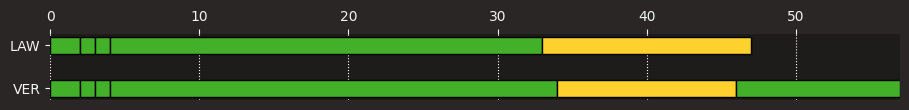

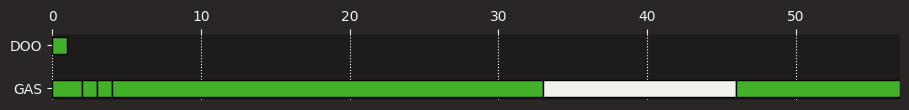

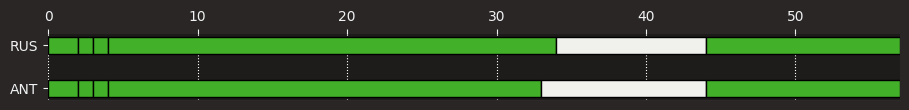

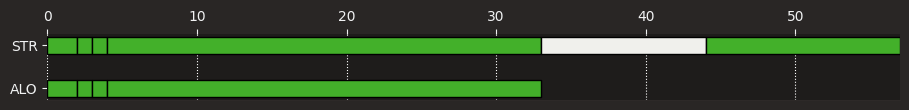

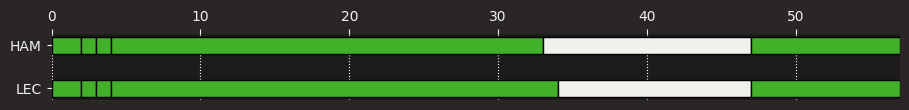

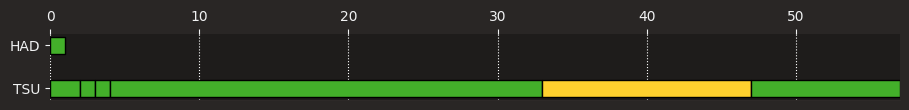

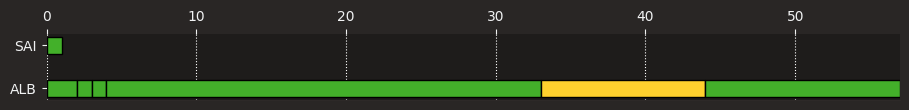

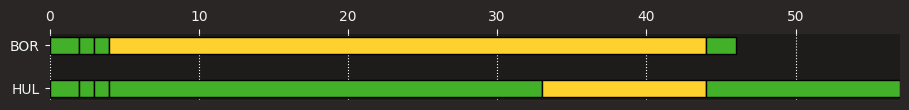

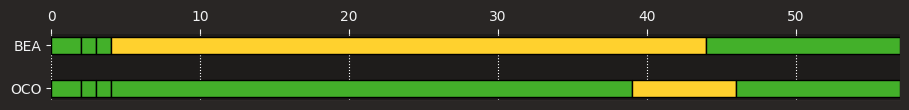

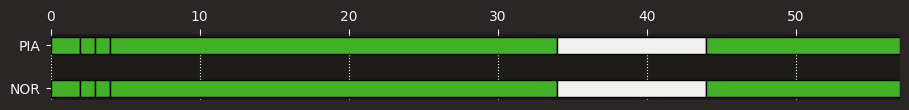

In [6]:
#year = int(input('Year ? '))
#race_number = int(input('Race Number ? '))
#race_session = input('Session ? ')

year = 2025
race_number = 1
race_session = 'R'

session = fastf1.get_session(year, race_number, race_session)
session.load()

event_name = session.event.EventName
circuit_info = session.get_circuit_info()

start_time = time.time()
event_name = session.event.EventName
teams = fastf1.plotting.list_team_names(session)

for idx,team in enumerate(teams):
    team_drivers = fastf1.plotting.get_driver_abbreviations_by_team(team, session=session)
    team_color = fastf1.plotting.get_team_color(team, session=session)
    df_color=pd.read_csv("../data/raw/second_color.csv", index_col='team')
    team_color_2 = df_color.loc[team][0]
    try:
        show_tyre_strategy(team_drivers, session)
    except:
        print(f'No data for {team}')